# Prepare Chicago Crime Data for a GitHub Repository

Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
        
Updated 11/17/22

This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.


# INSTRUCTIONS
Go to the Chicago Data Portal's page for "Crimes - 2001 to Preset".

Click on the Export button on the top right and select CSV.

Save the file to your Downloads folder instead of your repository. The file is too big for a repository.

Wait for the full file to download.

It is very large (over >1.7GB and may take several minutes to fully download.)

Once the download is complete, change RAW_FILE variable below to match the filepath to the downloaded file.

# Set the correct RAW_FILE path

In [9]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\esnak\Downloads/'



In [13]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = r"C:\Users\esnak\Downloads\Crimes_-_2001_to_Present.csv" #(or slice correct index from the crime_files list)

if RAW_FILE == r"C:\Users\esnak\Downloads\Crimes_-_2001_to_Present.csv":
	raise Exception("You must update the RAW_FILE variable to match your local filepath.")
	
RAW_FILE

Exception: You must update the RAW_FILE variable to match your local filepath.

In [5]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Import 

In [52]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns


import missingno as msno
import datetime as dt
import statsmodels.tsa.api as tsa


# Load data

In [15]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.00,12.00,61.00,08B,"1,165,074.00","1,875,917.00",2015,02/10/2018 03:50:01 PM,41.82,-87.67,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.00,29.00,25.00,06,"1,138,875.00","1,904,869.00",2015,02/10/2018 03:50:01 PM,41.90,-87.77,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.00,35.00,21.00,18,"1,152,037.00","1,920,384.00",2015,02/10/2018 03:50:01 PM,41.94,-87.72,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.00,28.00,25.00,08A,"1,141,706.00","1,900,086.00",2015,02/10/2018 03:50:01 PM,41.88,-87.76,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7725837,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.00,44.00,6.00,26,"1,172,497.00","1,919,410.00",2022,01/03/2023 03:46:28 PM,41.93,-87.64,"(41.934304581, -87.641484982)"
7725838,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.00,9.00,49.00,11,"1,179,966.00","1,828,818.00",2022,01/03/2023 03:46:28 PM,41.69,-87.62,"(41.685543881, -87.616812541)"
7725839,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.00,5.00,43.00,06,"1,193,181.00","1,859,005.00",2022,01/03/2023 03:46:28 PM,41.77,-87.57,"(41.768068052, -87.567452932)"
7725840,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.00,45.00,11.00,18,"1,140,553.00","1,933,418.00",2022,01/03/2023 03:46:28 PM,41.97,-87.76,"(41.973391184, -87.758534512)"


# Explore data

In [55]:
chicago_full.shape

(7725842, 22)

In [47]:
# check duplicate
chicago_full.duplicated().sum()

0

In [48]:
# check missing values 
chicago_full.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      9981
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614847
Community Area          613476
FBI Code                     0
X Coordinate             84221
Y Coordinate             84221
Year                         0
Updated On                   0
Latitude                 84221
Longitude                84221
Location                 84221
dtype: int64

In [50]:
# check % missing values 
chicago_full.isna().sum()/len(chicago_full)*100

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.13
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   7.96
Community Area         7.94
FBI Code               0.00
X Coordinate           1.09
Y Coordinate           1.09
Year                   0.00
Updated On             0.00
Latitude               1.09
Longitude              1.09
Location               1.09
dtype: float64

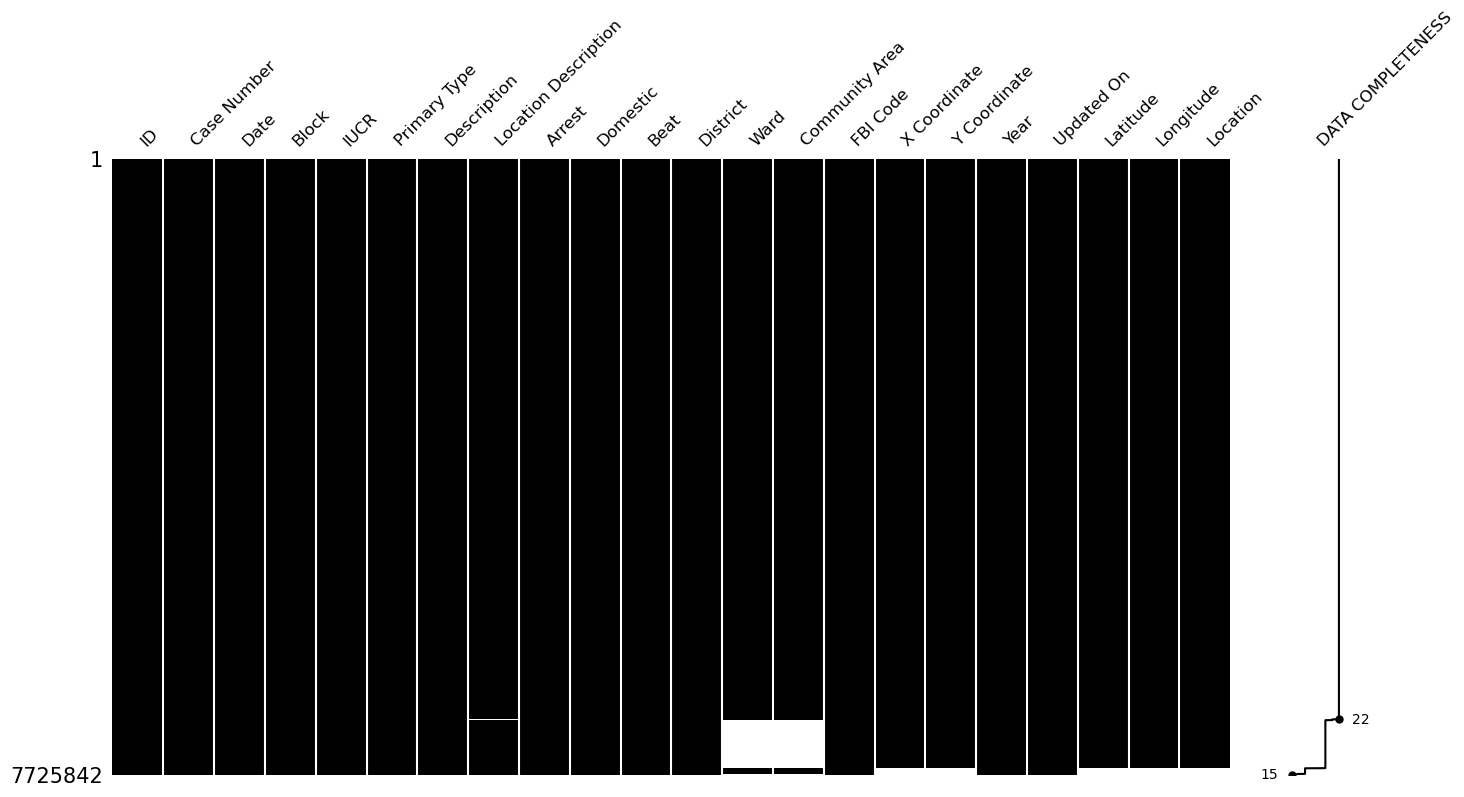

In [54]:
# Display missing values by column
msno.matrix(chicago_full, figsize=(16,8), labels=True, 
            fontsize=12, sort="descending", color=(0,0,0));

In [57]:
# check dtype
chicago_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7725842 entries, 2001-01-01 01:00:00 to 2023-01-25 12:58:00
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  object 
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2

In [59]:
# this code will fiter out the object type columns and creates a list of each of column names as an index
chicago_full_types = chicago_full.dtypes
str_cols = chicago_full_types[chicago_full_types=='object'].index
str_cols

Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'FBI Code', 'Year', 'Updated On', 'Location'],
      dtype='object')

In [61]:
# check object columns
# This for loop prints out each column name and then lists each category
# in the column along with the counts of each category
for col in str_cols:
  print(f'- {col}:')
  print(chicago_full[col].value_counts(dropna=False))
  print('\n')


- Case Number:
HJ590004    6
HZ140230    6
JE266473    5
HS256531    5
JC470284    5
           ..
HM422422    1
HM424813    1
HM421886    1
HM421611    1
JG128507    1
Name: Case Number, Length: 7725304, dtype: int64


- Date:
01/01/2008 12:01:00 AM    303
01/01/2007 12:01:00 AM    257
01/01/2006 12:01:00 AM    226
01/01/2004 12:00:00 AM    218
01/01/2005 12:01:00 AM    214
                         ... 
11/29/2007 10:15:00 PM      1
11/29/2007 10:16:00 PM      1
11/29/2007 10:19:36 AM      1
11/29/2007 10:20:00 AM      1
01/25/2023 12:58:00 AM      1
Name: Date, Length: 3179458, dtype: int64


- Block:
100XX W OHARE ST         16401
001XX N STATE ST         15016
076XX S CICERO AVE       10041
008XX N MICHIGAN AVE      9380
0000X N STATE ST          8930
                         ...  
034XX W GLENLAKE AV          1
034XX W THORNDALE AV         1
067XX S LAKE SHORE DR        1
032XX E 132 ST               1
024XX W Thorndale Ave        1
Name: Block, Length: 62659, dtype: int64


- IUC

In [56]:
# check numeric columns
# Summary statistics for numeric columns
chicago_full.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude
count,"7,725,842.00","7,725,842.00","7,725,795.00","7,110,995.00","7,112,366.00","7,641,621.00","7,641,621.00","7,641,621.00","7,641,621.00"
mean,"6,981,116.11","1,186.17",11.29,22.75,37.49,"1,164,595.61","1,885,777.22",41.84,-87.67
std,"3,476,707.92",703.10,6.95,13.85,21.54,"16,849.27","32,279.31",0.09,0.06
min,634.00,111.00,1.00,1.00,0.00,0.00,0.00,36.62,-91.69
25%,"3,764,612.25",621.00,6.00,10.00,23.00,"1,152,973.00","1,859,075.00",41.77,-87.71
50%,"6,985,417.50","1,034.00",10.00,23.00,32.00,"1,166,102.00","1,890,722.00",41.86,-87.67
75%,"10,055,523.75","1,731.00",17.00,34.00,57.00,"1,176,368.00","1,909,268.00",41.91,-87.63
max,"12,969,688.00","2,535.00",31.00,50.00,77.00,"1,205,119.00","1,951,622.00",42.02,-87.52


# Preparing the Datetime Index

In [16]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [17]:
# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1319931,G001079,01/01/2001 01:00:00 PM,060XX S ARTESIAN AV,0460,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,NaN,08B,"1,161,114.00","1,864,508.00",2001,08/17/2015 03:03:40 PM,41.78,-87.68,"(41.783892488, -87.684841225)"
2001-01-01 01:00:00,1328315,G020979,01/01/2001 01:00:00 AM,067XX S JUSTINE ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,NaN,11,"1,167,126.00","1,859,954.00",2001,08/17/2015 03:03:40 PM,41.77,-87.66,"(41.771269195, -87.662929135)"
2001-01-01 01:00:00,6154338,HP242745,01/01/2001 01:00:00 PM,065XX S KEDZIE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,66.00,06,"1,156,214.00","1,861,165.00",2001,04/02/2008 01:05:33 AM,41.77,-87.70,"(41.774818809, -87.702896431)"
2001-01-01 01:00:00,1311732,G001071,01/01/2001 01:00:00 PM,013XX N BOSWORTH AV,2851,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,NaN,26,"1,165,804.00","1,908,952.00",2001,08/17/2015 03:03:40 PM,41.91,-87.67,"(41.905752775, -87.666380466)"
2001-01-01 01:00:00,1311735,G000502,01/01/2001 01:00:00 AM,069XX W BELMONT AV,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,NaN,04B,"1,129,212.00","1,920,519.00",2001,08/17/2015 03:03:40 PM,41.94,-87.80,"(41.938196134, -87.800533735)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25 12:45:00,12966579,JG132493,01/25/2023 12:45:00 PM,048XX S LAKE PARK AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,222,2.00,4.00,39.00,11,"1,186,842.00","1,873,319.00",2023,02/01/2023 03:51:57 PM,41.81,-87.59,"(41.807499342, -87.590234482)"
2023-01-25 12:48:00,12963408,JG129052,01/25/2023 12:48:00 PM,005XX W 66TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,722,7.00,20.00,68.00,15,"1,173,955.00","1,861,143.00",2023,02/01/2023 03:51:57 PM,41.77,-87.64,"(41.774383146, -87.637861239)"
2023-01-25 12:51:00,12963198,JG128506,01/25/2023 12:51:00 AM,012XX W MARQUETTE RD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,724,7.00,17.00,67.00,08B,"1,169,036.00","1,860,348.00",2023,02/01/2023 03:51:57 PM,41.77,-87.66,"(41.772309311, -87.655916369)"


# Separate the Full Dataset by Years

In [20]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()

2002    486799
2001    485865
2003    475979
2004    469418
2005    453767
2006    448172
2007    437080
2008    427160
2009    392816
2010    370491
2011    351957
2012    336252
2013    307451
2014    275721
2016    269769
2017    269032
2018    268732
2015    264732
2019    261190
2022    236530
2020    212011
2021    208355
2023     16563
Name: Year, dtype: int64

In [21]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [22]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,2001,41.78,-87.68
2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,2001,41.77,-87.66
2001-01-01 01:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,2001,41.77,-87.70
2001-01-01 01:00:00,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,2001,41.91,-87.67
2001-01-01 01:00:00,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,2001,41.94,-87.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25 12:45:00,12966579,01/25/2023 12:45:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,222,2.00,4.00,2023,41.81,-87.59
2023-01-25 12:48:00,12963408,01/25/2023 12:48:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,722,7.00,20.00,2023,41.77,-87.64
2023-01-25 12:51:00,12963198,01/25/2023 12:51:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,724,7.00,17.00,2023,41.77,-87.66


In [23]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7725842 entries, 2001-01-01 01:00:00 to 2023-01-25 12:58:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 722.1+ MB


In [63]:
chicago_final.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2023-01-25 12:35:00', '2023-01-25 12:40:00',
               '2023-01-25 12:40:00', '2023-01-25 12:40:00',
               '2023-01-25 12:45:00', '2023-01-25 12:45:00',
               '2023-01-25 12:48:00', '2023-01-25 12:51:00',
               '2023-01-25 12:51:00', '2023-01-25 12:58:00'],
              dtype='datetime64[ns]', name='Datetime', length=7725842, freq=None)

In [24]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   61,806,736.00
ID                      61,806,736.00
Date                   610,341,518.00
Primary Type           517,846,510.00
Description            565,412,498.00
Location Description   526,553,831.00
Arrest                   7,725,842.00
Domestic                 7,725,842.00
Beat                    61,806,736.00
District                61,806,736.00
Ward                    61,806,736.00
Year                   471,276,362.00
Latitude                61,806,736.00
Longitude               61,806,736.00
dtype: float64

In [25]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [26]:
FINAL_DROP = ['Datetime','Year']#,'Location Description']

In [27]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [29]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 02/02/2023
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 02/02/2023
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



# Confirmation

Follow the example usage above to test if your files were created successfully.

In [30]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,41.78,-87.68
1,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,41.77,-87.66
2,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70
3,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,41.91,-87.67
4,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,41.94,-87.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,12966579,01/25/2023 12:45:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,222,2.00,4.00,41.81,-87.59
16559,12963408,01/25/2023 12:48:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,722,7.00,20.00,41.77,-87.64
16560,12963198,01/25/2023 12:51:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,724,7.00,17.00,41.77,-87.66
16561,12963001,01/25/2023 12:51:00 AM,OTHER OFFENSE,VIOLATION OF CIVIL NO CONTACT ORDER,RESIDENCE,False,True,631,6.00,6.00,41.75,-87.62


In [64]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
       'Longitude'],
      dtype='object')

In [31]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485865
2002    486799
2003    475979
2004    469418
2005    453767
2006    448172
2007    437080
2008    427160
2009    392816
2010    370491
2011    351957
2012    336252
2013    307451
2014    275721
2015    264732
2016    269769
2017    269032
2018    268732
2019    261190
2020    212011
2021    208355
2022    236530
2023     16563
Name: Date, dtype: int64

# Supplemental Data: Holiday Data

In [227]:
url_holidays = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTMR4vi1nFtbYO_WLqecU6WoRAQ0F-_QCMcuWUoZhuTygAP2U668cddCWBeAV2eop9fFdyXX856AB2j/pub?output=csv'
df_holiday = pd.read_csv(url_holidays)
df_holiday

,Date,US Holidays,State Holidays
0,2001-01-01,New Year's Day,New Year's Day
1,2001-01-02,NaN,NaN
2,2001-01-03,NaN,NaN
3,2001-01-04,NaN,NaN
4,2001-01-05,NaN,NaN
...,...,...,...
7942,2022-09-30,NaN,NaN
7943,2022-10-01,NaN,NaN
7944,2022-10-02,NaN,NaN
7945,2022-10-03,NaN,NaN


In [228]:
df_holiday['US Holidays'].value_counts()

New Year's Day                                     22
Martin Luther King Jr. Day                         22
Washington's Birthday                              22
Memorial Day                                       22
Independence Day                                   22
Labor Day                                          22
Columbus Day                                       21
Veterans Day                                       21
Thanksgiving                                       21
Christmas Day                                      21
Veterans Day (Observed)                             6
Independence Day (Observed)                         6
Christmas Day (Observed)                            6
New Year's Day (Observed)                           6
Juneteenth National Independence Day (Observed)     2
Juneteenth National Independence Day                2
Name: US Holidays, dtype: int64

# 2) Crimes Across the Years:
Is the total number of crimes increasing or decreasing across the years?
Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [38]:
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,2001,41.78,-87.68
2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,2001,41.77,-87.66
2001-01-01 01:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,2001,41.77,-87.70
2001-01-01 01:00:00,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,2001,41.91,-87.67
2001-01-01 01:00:00,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,2001,41.94,-87.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25 12:45:00,12966579,01/25/2023 12:45:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,222,2.00,4.00,2023,41.81,-87.59
2023-01-25 12:48:00,12963408,01/25/2023 12:48:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,722,7.00,20.00,2023,41.77,-87.64
2023-01-25 12:51:00,12963198,01/25/2023 12:51:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,724,7.00,17.00,2023,41.77,-87.66


In [66]:
date_year = chicago_final.resample('Y').size()
date_year

Datetime
2001-12-31    485865
2002-12-31    486799
2003-12-31    475979
2004-12-31    469418
2005-12-31    453767
2006-12-31    448172
2007-12-31    437080
2008-12-31    427160
2009-12-31    392816
2010-12-31    370491
2011-12-31    351957
2012-12-31    336252
2013-12-31    307451
2014-12-31    275721
2015-12-31    264732
2016-12-31    269769
2017-12-31    269032
2018-12-31    268732
2019-12-31    261190
2020-12-31    212011
2021-12-31    208355
2022-12-31    236530
2023-12-31     16563
Freq: A-DEC, dtype: int64

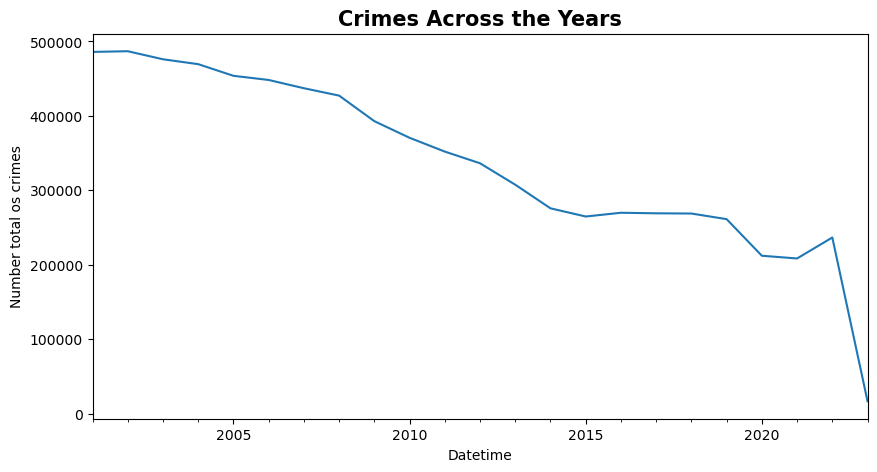

In [74]:
plt.rcParams['figure.figsize'] = [10,5]
date_year.plot()
plt.ylabel('Number total os crimes')
plt.title('Crimes Across the Years', fontsize = 15, fontweight = 'bold')
plt.show()

## Is the total number of crimes increasing or decreasing across the years?

As we can see in the plot above the number of crimes decrease over the years. 

## Are there any individual crimes that are doing the opposite ?

(e.g decreasing when overall crime is increasing or vice-versa

In [76]:
df_groupby = chicago_final.groupby('Primary Type').resample("Y").size()
df_groupby

Primary Type       Datetime  
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2019-12-31    6339
                   2020-12-31    8431
                   2021-12-31    8978
                   2022-12-31    8725
                   2023-12-31     639
Length: 750, dtype: int64

In [77]:
# Now we have we have a multi-index with 2 levels.
# Level 0 (the outer-most index on the left) and level 1 (the next/inner index)

# level 0 is Primary Type
df_groupby.index.get_level_values(0)

Index(['ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON',
       'ARSON', 'ARSON',
       ...
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type', length=750)

In [80]:
df_groupby.index.get_level_values(1)

DatetimeIndex(['2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31',
               ...
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31'],
              dtype='datetime64[ns]', name='Datetime', length=750, freq=None)

In [78]:
# Unstack accepts a "level" argument for which level of our multi-index should be converted into columns.
# We want the (level 0) so we will need to specify level=0.

unstacked = df_groupby.unstack(level=0)
unstacked

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-12-31,"1,011.00","31,384.00","93,458.00","26,014.00",1.00,"1,779.00","55,857.00",30.00,"13,241.00","14,941.00",1.00,934.00,667.00,NaN,406.00,279.00,933.00,"1,637.00","27,551.00","50,567.00",NaN,NaN,NaN,19.00,"2,258.00",6.00,"29,663.00","6,026.00",9.00,"2,750.00",8.00,"18,441.00","2,240.00",204.00,"99,274.00","4,276.00"
2002-12-31,"1,032.00","31,523.00","94,153.00","25,623.00",0.00,"1,808.00","55,941.00",26.00,"13,880.00","13,729.00",NaN,971.00,658.00,NaN,361.00,337.00,829.00,"1,414.00","25,121.00","51,789.00",NaN,NaN,NaN,26.00,"2,590.00",5.00,"32,600.00","6,408.00",8.00,"2,457.00",2.00,"18,523.00","2,173.00",200.00,"98,331.00","4,281.00"
2003-12-31,955.00,"29,477.00","88,379.00","25,156.00",0.00,"1,572.00","55,011.00",39.00,"14,807.00","13,459.00",NaN,"1,088.00",604.00,NaN,408.00,364.00,705.00,"1,311.00","22,748.00","54,288.00",NaN,1.00,NaN,16.00,"3,047.00",2.00,"31,147.00","6,214.00",6.00,"2,430.00",2.00,"17,332.00","2,077.00",247.00,"98,876.00","4,211.00"
2004-12-31,778.00,"28,850.00","87,136.00","24,564.00",0.00,"1,545.00","53,164.00",34.00,"15,913.00","13,255.00",NaN,"1,122.00",455.00,NaN,531.00,349.00,482.00,985.00,"22,805.00","57,060.00",NaN,0.00,NaN,13.00,"3,096.00",9.00,"29,532.00","7,476.00",9.00,"2,495.00",1.00,"15,978.00","1,805.00",215.00,"95,463.00","4,298.00"
2005-12-31,691.00,"27,066.00","83,964.00","25,503.00",0.00,"1,528.00","54,548.00",29.00,"16,655.00","13,590.00",NaN,"1,078.00",453.00,NaN,615.00,258.00,389.00,"1,005.00","22,497.00","56,234.00",NaN,0.00,NaN,19.00,"2,903.00",9.00,"28,028.00","6,124.00",4.00,"2,730.00",2.00,"16,047.00","1,816.00",192.00,"85,684.00","4,106.00"
2006-12-31,726.00,"25,945.00","80,666.00","24,324.00",0.00,"1,440.00","57,124.00",44.00,"14,505.00","13,606.00",NaN,"1,368.00",476.00,NaN,758.00,276.00,339.00,"1,135.00","21,818.00","55,813.00",NaN,0.00,NaN,17.00,"2,779.00",9.00,"27,101.00","7,034.00",4.00,"3,068.00",7.00,"15,968.00","1,575.00",186.00,"86,240.00","3,821.00"
2007-12-31,712.00,"26,313.00","79,593.00","24,858.00",0.00,"1,509.00","53,749.00",50.00,"13,699.00","14,170.00",NaN,"1,409.00",448.00,NaN,677.00,255.00,329.00,"1,170.00","18,573.00","54,454.00",NaN,0.00,NaN,11.00,"2,916.00",12.00,"26,863.00","6,087.00",5.00,"3,315.00",1.00,"15,450.00","1,529.00",213.00,"85,156.00","3,554.00"
2008-12-31,644.00,"25,449.00","75,926.00","26,218.00",0.00,"1,518.00","52,842.00",34.00,"12,310.00","14,930.00",NaN,"1,199.00",514.00,NaN,580.00,261.00,359.00,912.00,"18,881.00","46,507.00",NaN,0.00,NaN,13.00,"2,656.00",12.00,"26,533.00","5,141.00",4.00,"3,013.00",0.00,"16,703.00","1,500.00",190.00,"88,434.00","3,877.00"
2009-12-31,616.00,"22,861.00","68,460.00","26,767.00",0.00,"1,406.00","47,725.00",34.00,"10,851.00","13,874.00",NaN,991.00,461.00,NaN,573.00,231.00,293.00,746.00,"15,482.00","43,542.00",NaN,1.00,NaN,21.00,"2,629.00",7.00,"25,601.00","3,940.00",10.00,"3,147.00",0.00,"15,981.00","1,265.00",168.00,"80,975.00","4,158.00"


In [79]:
# check numerical columns
unstacked.describe()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
count,23.00,23.00,23.00,23.00,23.00,20.00,23.00,23.00,23.00,23.00,1.00,23.00,23.00,13.00,23.00,23.00,23.00,23.00,23.00,23.00,4.00,20.00,7.00,23.00,23.00,22.00,23.00,23.00,22.00,23.00,20.00,23.00,23.00,23.00,23.00,23.00
mean,572.13,"21,843.65","61,450.17","18,380.65",45.09,"1,383.55","38,301.65",272.00,"9,267.57","14,792.52",1.00,635.52,540.09,7.62,792.61,200.26,312.65,646.09,"16,038.13","32,428.35",9.50,9.05,1.29,35.13,"2,397.43",6.68,"20,860.74","3,035.04",8.77,"2,266.26",1.20,"12,626.09","1,318.61",203.57,"70,867.57","4,543.43"
std,230.90,"6,376.16","21,952.76","8,203.62",71.81,358.77,"14,650.01",474.44,"4,431.03","3,833.00",NaN,480.13,167.93,6.12,413.11,85.58,230.32,469.32,"6,447.10","19,773.58",7.59,14.61,1.11,22.80,593.32,3.09,"7,489.44","2,631.54",3.68,981.52,2.28,"4,341.49",482.22,73.55,"22,570.52","1,931.21"
min,36.00,"1,351.00","2,574.00",522.00,0.00,75.00,"2,068.00",26.00,294.00,830.00,1.00,1.00,39.00,0.00,26.00,18.00,7.00,14.00,"2,363.00",399.00,3.00,0.00,0.00,3.00,119.00,1.00,961.00,56.00,4.00,43.00,0.00,724.00,60.00,39.00,"3,280.00",639.00
25%,434.00,"19,024.00","49,344.50","12,373.50",0.00,"1,351.50","27,811.00",36.50,"6,607.50","13,598.00",1.00,190.00,450.50,2.00,469.50,143.00,181.50,229.50,"10,331.50","13,459.00",4.50,0.00,0.50,18.00,"2,352.50",5.00,"17,123.00",726.50,5.25,"1,509.00",0.00,"9,658.50","1,056.50",178.50,"61,593.00","3,629.00"
50%,522.00,"20,619.00","59,135.00","22,845.00",0.00,"1,452.00","35,855.00",56.00,"8,216.00","14,170.00",1.00,724.00,508.00,10.00,677.00,171.00,242.00,573.00,"16,492.00","35,489.00",7.50,2.50,1.00,26.00,"2,443.00",6.00,"17,998.00","2,204.00",9.00,"2,495.00",0.00,"13,485.00","1,186.00",192.00,"75,152.00","4,106.00"
75%,701.50,"26,129.00","80,129.50","25,563.00",52.50,"1,520.50","53,456.50",137.00,"13,470.00","16,761.50",1.00,"1,034.50",662.50,12.00,"1,157.50",259.50,349.00,995.00,"21,605.50","51,178.00",12.50,8.50,2.00,49.50,"2,642.50",9.00,"26,982.00","6,056.50",10.00,"3,040.50",1.25,"15,979.50","1,552.00",210.00,"85,962.00","4,492.00"
max,"1,032.00","31,523.00","94,153.00","26,767.00",217.00,"1,808.00","57,124.00","1,537.00","16,655.00","19,789.00",1.00,"1,409.00",809.00,17.00,"1,546.00",364.00,933.00,"1,637.00","27,551.00","57,060.00",20.00,49.00,3.00,87.00,"3,096.00",12.00,"32,600.00","7,476.00",17.00,"3,538.00",8.00,"18,523.00","2,240.00",426.00,"99,274.00","8,978.00"


In [81]:
# check columns
unstacked.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

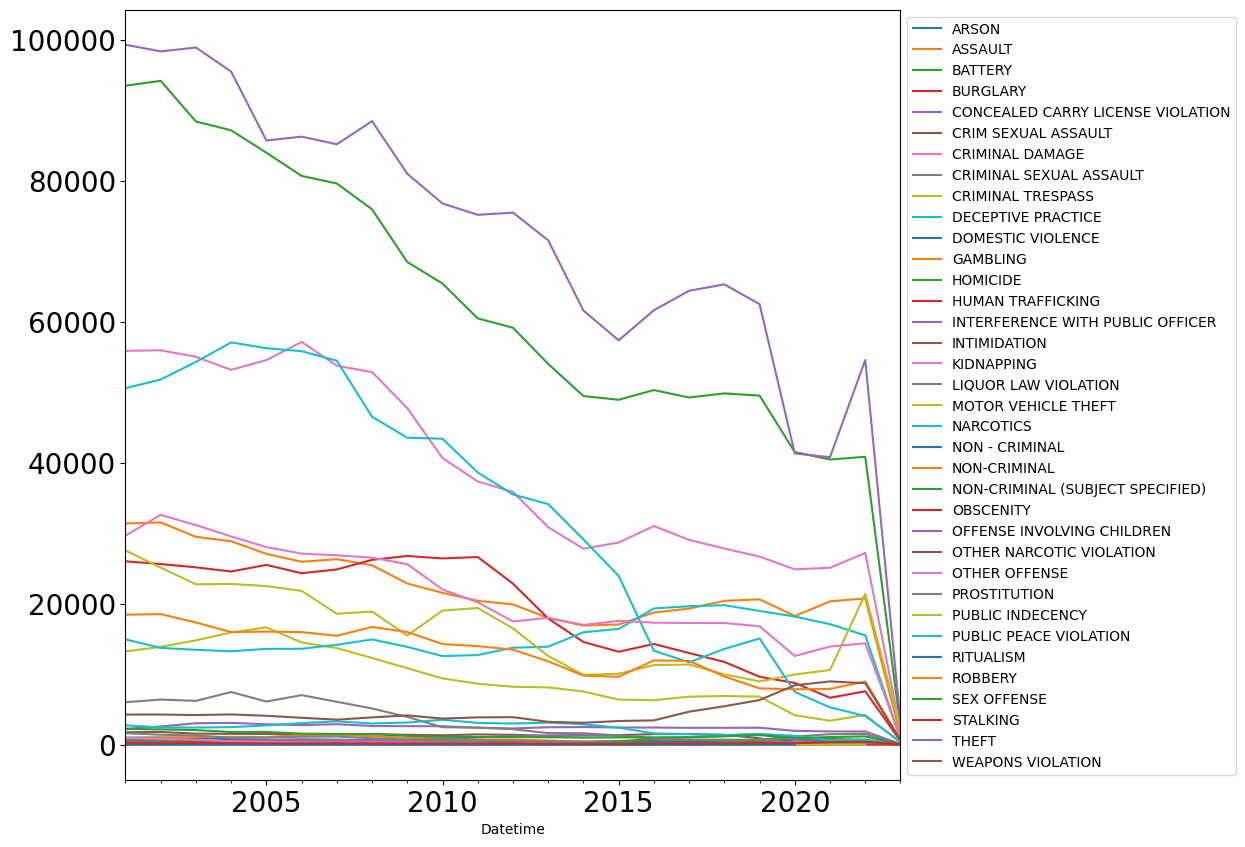

In [122]:
unstacked.plot(figsize=(10,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

As we can see in the plot above, something different in happen between 2015 and 2023. We can see some crimes decrease and others are increase but it is hard to see in one plot. Let's separate each crime into its own plot.  

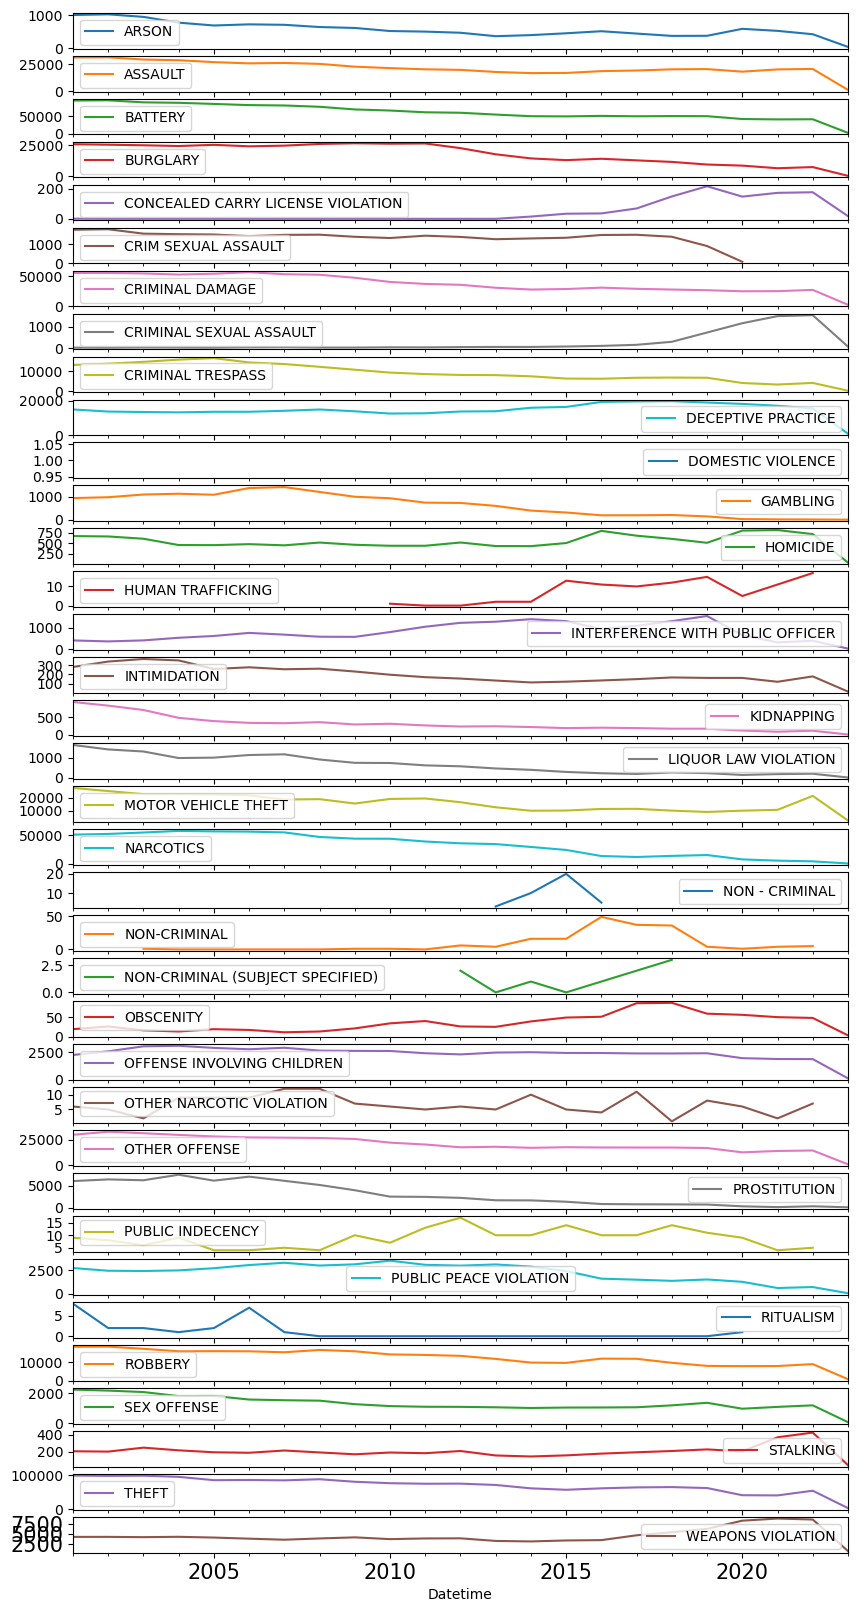

In [124]:
unstacked.plot(subplots= True, figsize=(10,20))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

As we can see in the plot above, there are more differences after 2010. Let's loc the data in 2012 to see. 

In [110]:
df_after_2012 = unstacked.loc['2012':]
df_after_2012

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-31,469.00,"19,899.00","59,135.00","22,845.00",0.00,"1,399.00","35,855.00",56.00,"8,216.00","13,756.00",NaN,724.00,515.00,0.00,"1,228.00",156.00,235.00,573.00,"16,492.00","35,489.00",NaN,6.00,2.00,26.00,"2,309.00",6.00,"17,483.00","2,204.00",17.00,"3,007.00",0.00,"13,485.00","1,085.00",207.00,"75,466.00","3,907.00"
2013-12-31,364.00,"17,972.00","54,005.00","17,895.00",0.00,"1,277.00","30,854.00",63.00,"8,136.00","13,907.00",NaN,596.00,431.00,2.00,"1,281.00",135.00,242.00,465.00,"12,582.00","34,127.00",3.00,4.00,0.00,25.00,"2,477.00",5.00,"17,998.00","1,652.00",10.00,"3,135.00",0.00,"11,820.00","1,055.00",154.00,"71,534.00","3,245.00"
2014-12-31,397.00,"16,903.00","49,450.00","14,569.00",15.00,"1,318.00","27,798.00",63.00,"7,539.00","15,945.00",NaN,393.00,429.00,2.00,"1,399.00",115.00,220.00,397.00,"9,911.00","29,118.00",10.00,16.00,1.00,39.00,"2,508.00",10.00,"16,985.00","1,625.00",10.00,"2,903.00",0.00,"9,800.00","1,010.00",142.00,"61,568.00","3,113.00"
2015-12-31,453.00,"17,048.00","48,923.00","13,184.00",34.00,"1,355.00","28,676.00",83.00,"6,401.00","16,428.00",NaN,310.00,502.00,13.00,"1,308.00",123.00,190.00,292.00,"10,068.00","23,939.00",20.00,16.00,0.00,49.00,"2,443.00",5.00,"17,566.00","1,322.00",14.00,"2,422.00",0.00,"9,638.00","1,038.00",155.00,"57,350.00","3,364.00"
2016-12-31,516.00,"18,742.00","50,298.00","14,289.00",36.00,"1,502.00","31,018.00",112.00,"6,306.00","19,324.00",NaN,189.00,790.00,11.00,936.00,136.00,202.00,227.00,"11,286.00","13,333.00",5.00,49.00,1.00,51.00,"2,436.00",4.00,"17,306.00",800.00,10.00,"1,607.00",0.00,"11,960.00","1,043.00",176.00,"61,618.00","3,450.00"
2017-12-31,444.00,"19,306.00","49,239.00","13,001.00",69.00,"1,513.00","29,045.00",162.00,"6,814.00","19,641.00",NaN,191.00,676.00,10.00,"1,087.00",150.00,190.00,191.00,"11,380.00","11,682.00",NaN,37.00,2.00,86.00,"2,397.00",11.00,"17,268.00",735.00,10.00,"1,498.00",0.00,"11,880.00","1,058.00",192.00,"64,381.00","4,686.00"
2018-12-31,373.00,"20,406.00","49,828.00","11,746.00",149.00,"1,408.00","27,824.00",302.00,"6,908.00","19,789.00",NaN,201.00,601.00,12.00,"1,307.00",168.00,173.00,268.00,"9,983.00","13,585.00",NaN,36.00,3.00,87.00,"2,396.00",1.00,"17,261.00",718.00,14.00,"1,372.00",0.00,"9,679.00","1,186.00",207.00,"65,285.00","5,456.00"
2019-12-31,376.00,"20,619.00","49,512.00","9,639.00",217.00,914.00,"26,681.00",733.00,"6,818.00","18,971.00",NaN,142.00,508.00,15.00,"1,546.00",163.00,173.00,232.00,"8,977.00","15,064.00",NaN,4.00,NaN,59.00,"2,413.00",8.00,"16,794.00",681.00,11.00,"1,520.00",0.00,"7,994.00","1,357.00",226.00,"62,484.00","6,339.00"
2020-12-31,589.00,"18,254.00","41,509.00","8,757.00",148.00,75.00,"24,878.00","1,164.00","4,177.00","18,182.00",NaN,25.00,796.00,5.00,654.00,163.00,119.00,143.00,"9,954.00","7,489.00",NaN,1.00,NaN,56.00,"1,965.00",6.00,"12,586.00",277.00,9.00,"1,269.00",1.00,"7,855.00",960.00,203.00,"41,311.00","8,431.00"


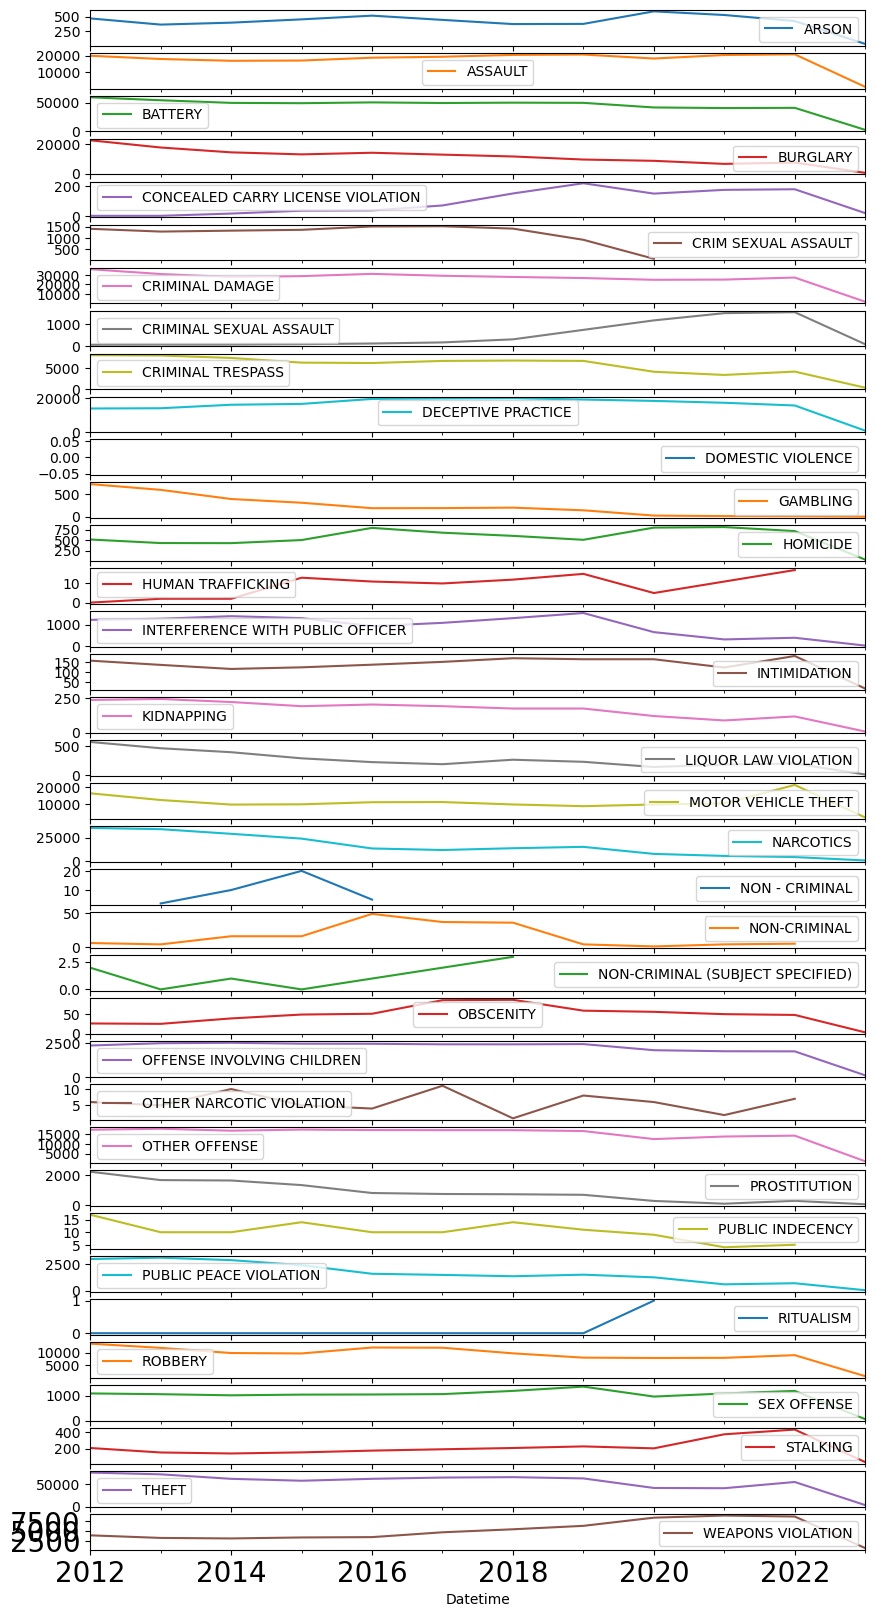

In [113]:
df_after_2012.plot(subplots= True, figsize=(10,20))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

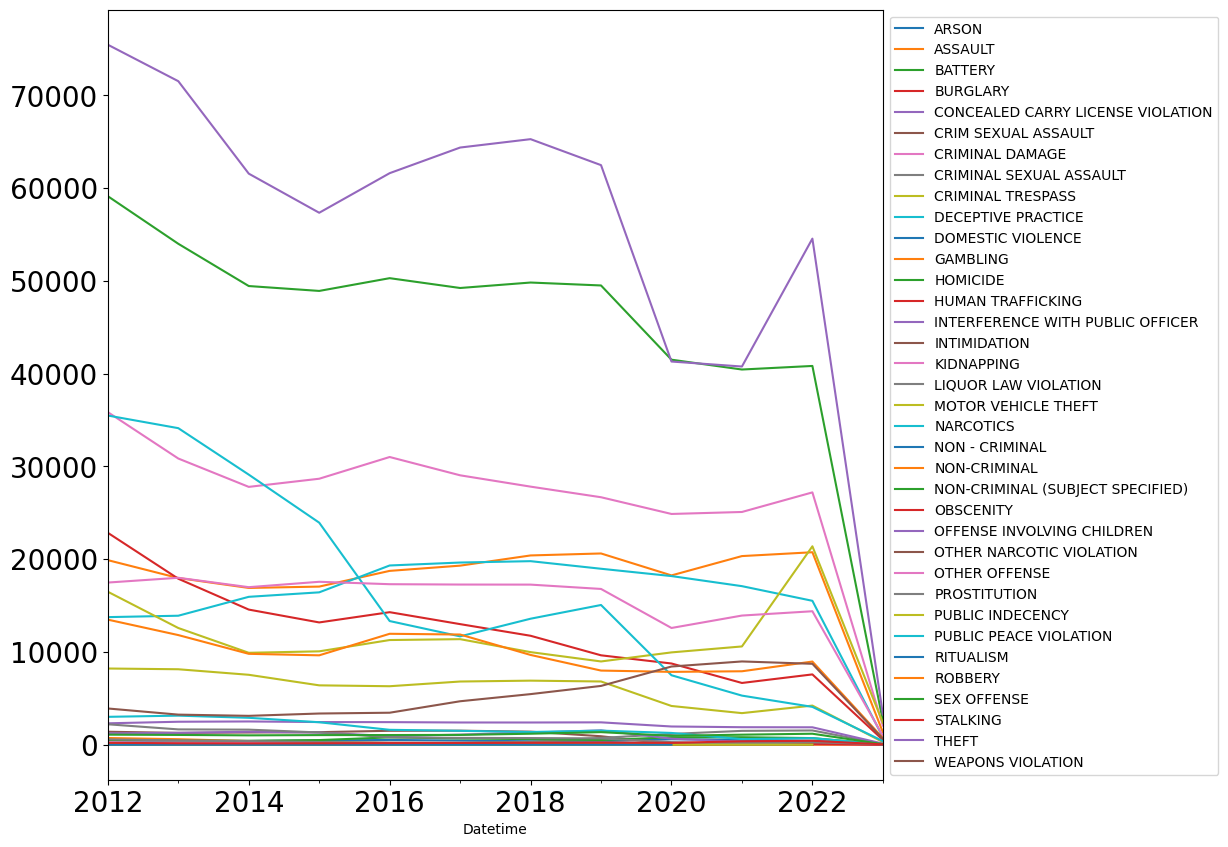

In [121]:
df_after_2012.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

As we can see in the plots above in 2015 most of crimes are stable or decrease but CONCEALED CARRY LICENSE VIOLATION  increase ultil 2018 

# 4) Comparing Months:


## What months have the most crime? What months have the least?

In [138]:
## making eda_df with date as a column instead of index
eda_df = chicago_final.reset_index()
eda_df.columns

Index(['Datetime', 'ID', 'Date', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Year', 'Latitude', 'Longitude'],
      dtype='object')

In [139]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725842 entries, 0 to 7725841
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Datetime              datetime64[ns]
 1   ID                    int64         
 2   Date                  object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   Beat                  int64         
 9   District              float64       
 10  Ward                  float64       
 11  Year                  object        
 12  Latitude              float64       
 13  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 722.1+ MB


In [140]:
# Let's create month column
eda_df['month'] = eda_df['Datetime'].dt.month_name()
eda_df

,Datetime,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,month
0,2001-01-01 01:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,2001,41.78,-87.68,January
1,2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,2001,41.77,-87.66,January
2,2001-01-01 01:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,2001,41.77,-87.70,January
3,2001-01-01 01:00:00,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,2001,41.91,-87.67,January
4,2001-01-01 01:00:00,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,2001,41.94,-87.80,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7725837,2023-01-25 12:45:00,12966579,01/25/2023 12:45:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,222,2.00,4.00,2023,41.81,-87.59,January
7725838,2023-01-25 12:48:00,12963408,01/25/2023 12:48:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,722,7.00,20.00,2023,41.77,-87.64,January
7725839,2023-01-25 12:51:00,12963198,01/25/2023 12:51:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,724,7.00,17.00,2023,41.77,-87.66,January
7725840,2023-01-25 12:51:00,12963001,01/25/2023 12:51:00 AM,OTHER OFFENSE,VIOLATION OF CIVIL NO CONTACT ORDER,RESIDENCE,False,True,631,6.00,6.00,2023,41.75,-87.62,January


In [152]:
month = eda_df['month'].value_counts()
month

July         716944
August       710092
May          682698
June         681454
October      675931
September    667878
March        629483
April        626925
January      617449
November     608578
December     579203
February     529207
Name: month, dtype: int64

July is the month that has the highest number of crimes and February is the month with the lowest number of crimes. 

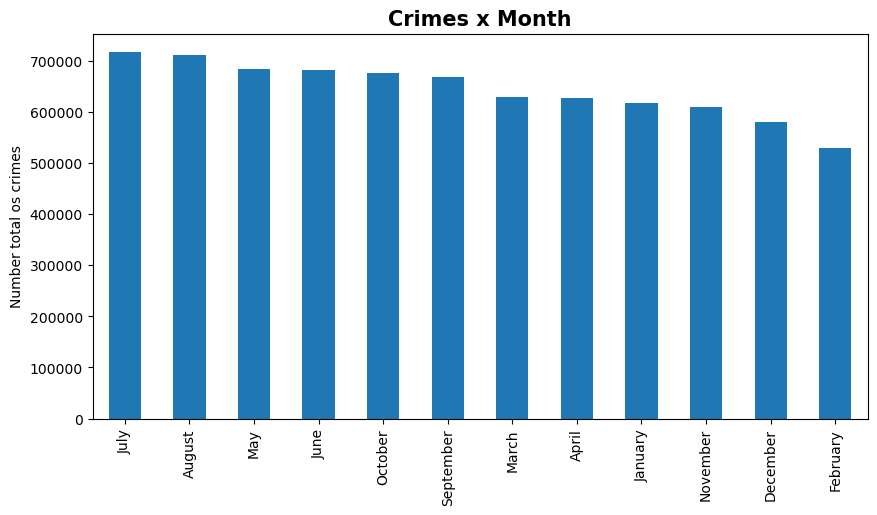

In [157]:
month.plot(kind='bar')
plt.ylabel('Number total os crimes')
plt.title('Crimes x Month', fontsize = 15, fontweight = 'bold')
plt.show()

## Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [165]:
df_m = eda_df.set_index('Datetime')
df_m

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,month
Datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,2001,41.78,-87.68,January
2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,2001,41.77,-87.66,January
2001-01-01 01:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,2001,41.77,-87.70,January
2001-01-01 01:00:00,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,2001,41.91,-87.67,January
2001-01-01 01:00:00,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,2001,41.94,-87.80,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25 12:45:00,12966579,01/25/2023 12:45:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,222,2.00,4.00,2023,41.81,-87.59,January
2023-01-25 12:48:00,12963408,01/25/2023 12:48:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,722,7.00,20.00,2023,41.77,-87.64,January
2023-01-25 12:51:00,12963198,01/25/2023 12:51:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,724,7.00,17.00,2023,41.77,-87.66,January


In [189]:
df_groupby_month = df_m.groupby('Primary Type').resample("M").size()
df_groupby_month

Primary Type       Datetime  
ARSON              2001-01-31     67
                   2001-02-28     57
                   2001-03-31     93
                   2001-04-30     89
                   2001-05-31     94
                                ... 
WEAPONS VIOLATION  2022-09-30    778
                   2022-10-31    732
                   2022-11-30    596
                   2022-12-31    541
                   2023-01-31    639
Length: 8633, dtype: int64

In [190]:
df_groupby_month.index.get_level_values(0)

Index(['ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON',
       'ARSON', 'ARSON',
       ...
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type', length=8633)

In [169]:
unstacked = df_groupby_month.unstack(level=0)
unstacked

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.00,"2,123.00","6,526.00","1,934.00",NaN,162.00,"3,966.00",4.00,"1,192.00","1,397.00",1.00,44.00,42.00,NaN,36.00,18.00,75.00,101.00,"2,096.00","4,714.00",NaN,NaN,NaN,2.00,246.00,1.00,"2,800.00",563.00,NaN,161.00,2.00,"1,396.00",218.00,26.00,"7,865.00",337.00
2001-02-28,57.00,"2,029.00","6,040.00","1,666.00",NaN,134.00,"3,665.00",1.00,"1,063.00","1,161.00",NaN,37.00,27.00,NaN,27.00,24.00,57.00,109.00,"1,785.00","4,369.00",NaN,NaN,NaN,1.00,152.00,0.00,"2,488.00",426.00,1.00,173.00,0.00,"1,159.00",149.00,13.00,"6,669.00",301.00
2001-03-31,93.00,"2,824.00","7,662.00","1,832.00",NaN,149.00,"4,616.00",4.00,"1,141.00","1,313.00",NaN,55.00,37.00,NaN,22.00,22.00,72.00,147.00,"2,151.00","4,862.00",NaN,NaN,NaN,2.00,195.00,0.00,"2,836.00",550.00,0.00,267.00,2.00,"1,399.00",184.00,17.00,"7,765.00",344.00
2001-04-30,89.00,"2,746.00","8,328.00","1,932.00",NaN,132.00,"4,922.00",2.00,"1,133.00","1,199.00",NaN,79.00,59.00,NaN,34.00,21.00,49.00,164.00,"2,119.00","4,044.00",NaN,NaN,NaN,2.00,196.00,0.00,"2,483.00",564.00,1.00,229.00,1.00,"1,341.00",169.00,29.00,"7,702.00",321.00
2001-05-31,94.00,"2,903.00","8,887.00","1,997.00",1.00,155.00,"4,756.00",2.00,"1,067.00","1,259.00",NaN,94.00,42.00,NaN,41.00,25.00,56.00,194.00,"2,197.00","4,038.00",NaN,NaN,NaN,1.00,211.00,2.00,"2,529.00",503.00,1.00,239.00,1.00,"1,491.00",227.00,12.00,"8,420.00",390.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,50.00,"1,883.00","3,713.00",653.00,13.00,NaN,"2,614.00",138.00,378.00,"1,446.00",NaN,0.00,74.00,1.00,38.00,16.00,14.00,20.00,"2,409.00",301.00,NaN,0.00,NaN,7.00,159.00,2.00,"1,134.00",59.00,1.00,64.00,NaN,863.00,115.00,33.00,"5,094.00",778.00
2022-10-31,40.00,"1,833.00","3,491.00",687.00,10.00,NaN,"2,832.00",161.00,373.00,"1,458.00",NaN,0.00,64.00,1.00,37.00,23.00,11.00,19.00,"3,176.00",321.00,NaN,2.00,NaN,5.00,146.00,0.00,"1,146.00",26.00,1.00,72.00,NaN,945.00,89.00,39.00,"5,210.00",732.00
2022-11-30,30.00,"1,650.00","3,073.00",678.00,18.00,NaN,"2,454.00",106.00,329.00,"1,307.00",NaN,0.00,56.00,0.00,24.00,20.00,11.00,23.00,"2,940.00",293.00,NaN,0.00,NaN,3.00,133.00,0.00,"1,028.00",14.00,NaN,46.00,NaN,842.00,95.00,45.00,"4,677.00",596.00


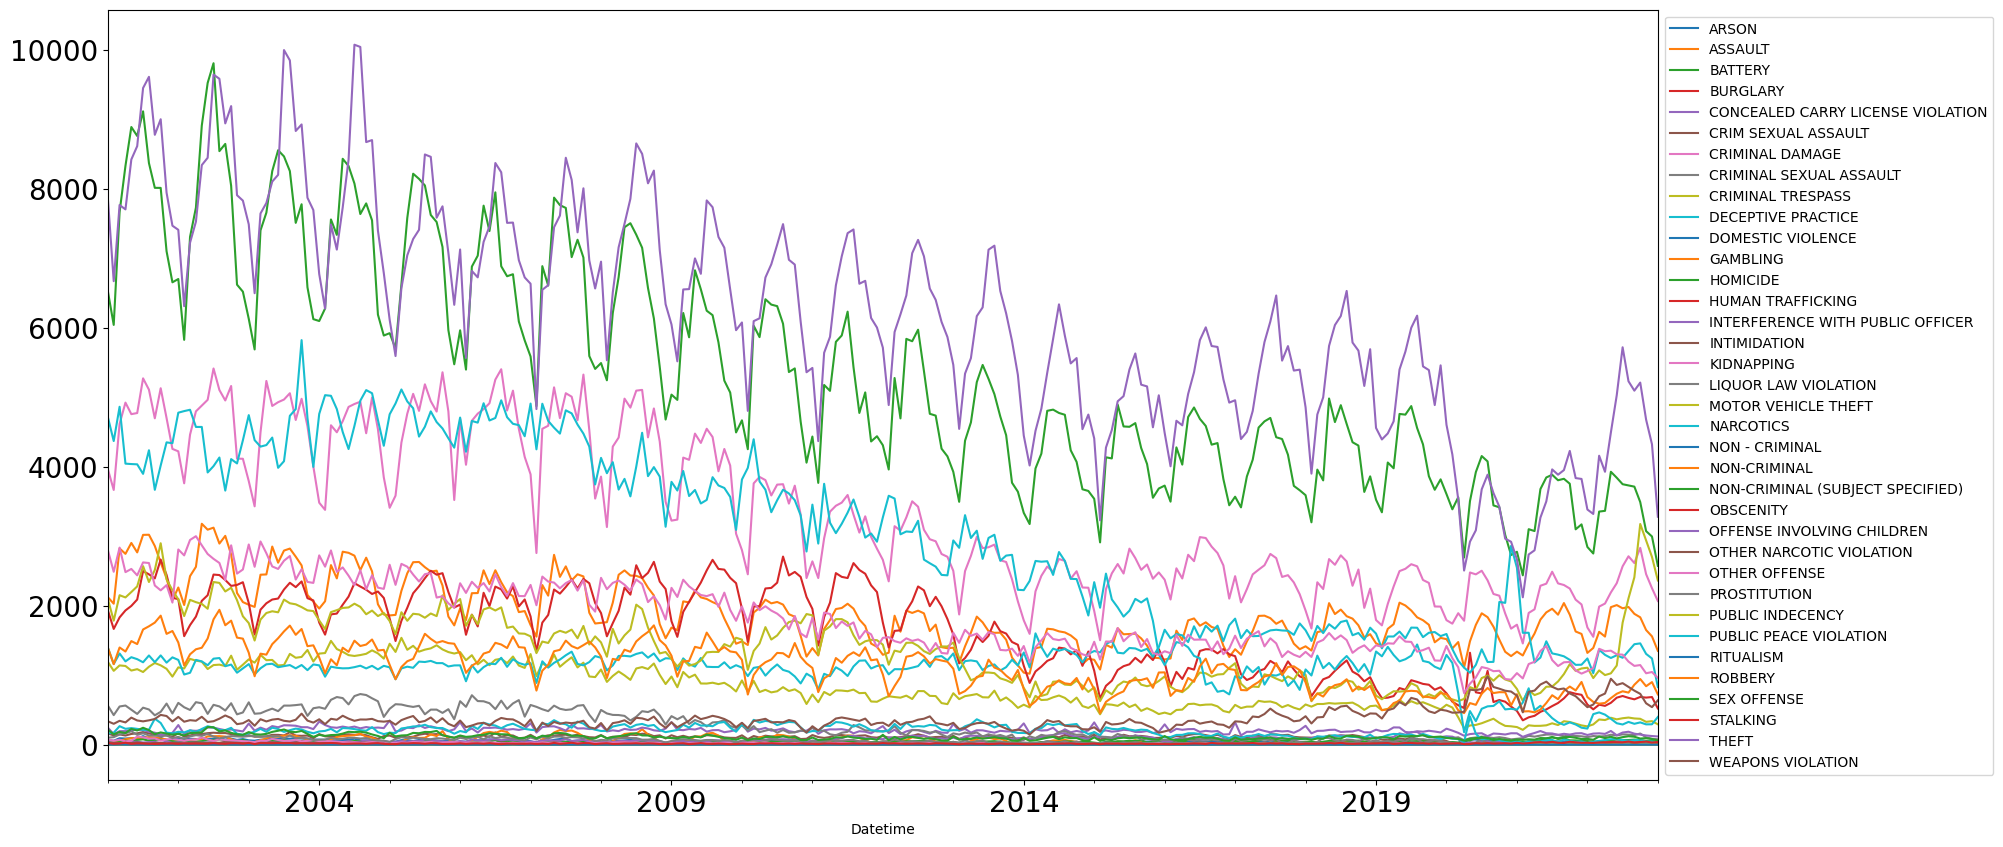

In [191]:
unstacked.plot(figsize=(20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

It is hard to see is this plot but we can see they are not exactly the same pattern. Let's check the numbers.  

In [196]:
unstacked.describe()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
count,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00,265.00
mean,49.66,"1,895.86","5,333.41","1,595.30",3.91,104.42,"3,324.29",23.61,804.35,"1,283.88",0.00,55.16,46.88,0.37,68.79,17.38,27.14,56.08,"1,391.99","2,814.54",0.14,0.68,0.03,3.05,208.08,0.55,"1,810.55",263.42,0.73,196.69,0.09,"1,095.85",114.45,17.67,"6,150.77",394.34
std,19.61,466.37,"1,666.61",648.27,6.42,46.93,"1,118.94",40.24,339.14,251.08,0.06,53.86,16.60,0.81,35.73,7.95,19.81,40.00,529.82,"1,573.36",0.64,1.40,0.18,2.66,41.93,0.89,532.78,218.18,0.89,83.67,0.37,332.38,39.86,7.11,"1,631.27",161.78
min,14.00,"1,022.00","2,437.00",351.00,0.00,0.00,"1,457.00",0.00,214.00,796.00,0.00,0.00,14.00,0.00,17.00,4.00,3.00,1.00,626.00,179.00,0.00,0.00,0.00,0.00,113.00,0.00,743.00,0.00,0.00,24.00,0.00,455.00,55.00,6.00,"2,121.00",146.00
25%,36.00,"1,556.00","3,927.00","1,048.00",0.00,98.00,"2,398.00",3.00,559.00,"1,123.00",0.00,9.00,36.00,0.00,39.00,11.00,14.00,22.00,915.00,"1,195.00",0.00,0.00,0.00,1.00,180.00,0.00,"1,388.00",68.00,0.00,137.00,0.00,795.00,87.00,13.00,"4,998.00",305.00
50%,46.00,"1,835.00","4,872.00","1,646.00",0.00,116.00,"2,974.00",5.00,714.00,"1,213.00",0.00,37.00,44.00,0.00,61.00,16.00,21.00,50.00,"1,349.00","3,068.00",0.00,0.00,0.00,2.00,204.00,0.00,"1,607.00",186.00,1.00,204.00,0.00,"1,119.00",104.00,17.00,"6,114.00",345.00
75%,61.00,"2,145.00","6,580.00","2,186.00",6.00,135.00,"4,481.00",14.00,"1,132.00","1,382.00",0.00,97.00,56.00,0.00,94.00,22.00,32.00,88.00,"1,827.00","4,254.00",0.00,1.00,0.00,4.00,232.00,1.00,"2,299.00",483.00,1.00,264.00,0.00,"1,365.00",134.00,21.00,"7,360.00",413.00
max,124.00,"3,179.00","9,805.00","2,707.00",34.00,182.00,"5,413.00",161.00,"1,538.00","2,861.00",1.00,223.00,112.00,4.00,183.00,50.00,119.00,194.00,"3,176.00","5,821.00",7.00,7.00,1.00,20.00,348.00,6.00,"3,000.00",729.00,5.00,408.00,3.00,"1,941.00",255.00,46.00,"10,071.00",984.00


In [263]:
list_cols = unstacked.columns


In [273]:
for col in list_cols:
    max_val = unstacked[col].max()
    #index_no = unstacked.columns.get_loc(max_val)
    max_val_date = unstacked.index[unstacked[col] == max_val]
    print(col)
    print(max_val)
    print(max_val_date)
    print('\n')

ARSON
124.0
DatetimeIndex(['2001-07-31'], dtype='datetime64[ns]', name='Datetime', freq=None)


ASSAULT
3179.0
DatetimeIndex(['2002-05-31'], dtype='datetime64[ns]', name='Datetime', freq=None)


BATTERY
9805.0
DatetimeIndex(['2002-07-31'], dtype='datetime64[ns]', name='Datetime', freq=None)


BURGLARY
2707.0
DatetimeIndex(['2010-08-31'], dtype='datetime64[ns]', name='Datetime', freq=None)


CONCEALED CARRY LICENSE VIOLATION
34.0
DatetimeIndex(['2019-09-30'], dtype='datetime64[ns]', name='Datetime', freq=None)


CRIM SEXUAL ASSAULT
182.0
DatetimeIndex(['2001-07-31'], dtype='datetime64[ns]', name='Datetime', freq=None)


CRIMINAL DAMAGE
5413.0
DatetimeIndex(['2002-07-31'], dtype='datetime64[ns]', name='Datetime', freq=None)


CRIMINAL SEXUAL ASSAULT
161.0
DatetimeIndex(['2022-10-31'], dtype='datetime64[ns]', name='Datetime', freq=None)


CRIMINAL TRESPASS
1538.0
DatetimeIndex(['2005-03-31'], dtype='datetime64[ns]', name='Datetime', freq=None)


DECEPTIVE PRACTICE
2861.0
DatetimeIndex(['2

As we can see in the loop above there are some crimes when the peak are not in July, some example are: 

DECEPTIVE PRACTICE the peak was in December, 

ASSAULT the peak was in May, 

CONCEALED CARRY LICENSE VIOLATION the peak was in September

CRIMINAL SEXUAL ASSAULTthe peak was October,

CRIMINAL TRESPASS the peak was in March,

DECEPTIVE PRACTICE the peak was in December.   

# 1) Comparing Police Districts:
Which district has the most crimes? Which has the least?

In [245]:
df_groupby_distric = chicago_final.groupby('District')
df_groupby_distric

In [256]:
# Analyzing the 'District' 
df_groupby_distric = chicago_final.groupby('District', as_index = False).size().sort_values(by=['size'])
df_groupby_distric

,District,size
19,21.00,4
23,31.00,232
18,20.00,136385
15,17.00,222909
21,24.00,233144
20,22.00,253159
14,16.00,258214
12,14.00,299210
0,1.00,311467
13,15.00,331880


## Which district has the most crimes? 

In [260]:
dist_most = df_groupby_distric.iloc[-1]
dist_most

District         8.00
size       519,330.00
Name: 7, dtype: float64

## Which has the least?

In [261]:
dist_least = df_groupby_distric.iloc[0]
dist_least

District   21.00
size        4.00
Name: 19, dtype: float64

# 5) Comparing Holidays:
Are there any holidays that show an increase in the # of crimes?
Are there any holidays that show a decrease in the # of crimes?

In [229]:
df_holiday

,Date,US Holidays,State Holidays
0,2001-01-01,New Year's Day,New Year's Day
1,2001-01-02,NaN,NaN
2,2001-01-03,NaN,NaN
3,2001-01-04,NaN,NaN
4,2001-01-05,NaN,NaN
...,...,...,...
7942,2022-09-30,NaN,NaN
7943,2022-10-01,NaN,NaN
7944,2022-10-02,NaN,NaN
7945,2022-10-03,NaN,NaN


In [233]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7947 entries, 0 to 7946
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            7947 non-null   object
 1   US Holidays     244 non-null    object
 2   State Holidays  301 non-null    object
dtypes: object(3)
memory usage: 186.4+ KB


In [230]:
df_holiday['US Holidays'].value_counts()

New Year's Day                                     22
Martin Luther King Jr. Day                         22
Washington's Birthday                              22
Memorial Day                                       22
Independence Day                                   22
Labor Day                                          22
Columbus Day                                       21
Veterans Day                                       21
Thanksgiving                                       21
Christmas Day                                      21
Veterans Day (Observed)                             6
Independence Day (Observed)                         6
Christmas Day (Observed)                            6
New Year's Day (Observed)                           6
Juneteenth National Independence Day (Observed)     2
Juneteenth National Independence Day                2
Name: US Holidays, dtype: int64

In [231]:
## Saving both holiday types as columns
eda_df["US Holiday"] = eda_df['Datetime'].map(df_holiday.get)
eda_df

,Datetime,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,month,US Holiday
0,2001-01-01 01:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,2001,41.78,-87.68,January,None
1,2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,2001,41.77,-87.66,January,None
2,2001-01-01 01:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,2001,41.77,-87.70,January,None
3,2001-01-01 01:00:00,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,2001,41.91,-87.67,January,None
4,2001-01-01 01:00:00,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,2001,41.94,-87.80,January,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7725837,2023-01-25 12:45:00,12966579,01/25/2023 12:45:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,222,2.00,4.00,2023,41.81,-87.59,January,None
7725838,2023-01-25 12:48:00,12963408,01/25/2023 12:48:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,722,7.00,20.00,2023,41.77,-87.64,January,None
7725839,2023-01-25 12:51:00,12963198,01/25/2023 12:51:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,724,7.00,17.00,2023,41.77,-87.66,January,None
7725840,2023-01-25 12:51:00,12963001,01/25/2023 12:51:00 AM,OTHER OFFENSE,VIOLATION OF CIVIL NO CONTACT ORDER,RESIDENCE,False,True,631,6.00,6.00,2023,41.75,-87.62,January,None


In [232]:
eda_df["US Holiday"].value_counts()

Series([], Name: US Holiday, dtype: int64)